In [1]:
import numpy as np

In [2]:
def remove_points(A):
    A = np.delete(A, [1, 2, 3])
    for i in range(0,int(len(A)/4)):
        index = i+4
        A = np.delete(A, [index-2, index-1, index])
    return A

def C_SS(xi):

    i1 = i0/(F * kf)

    return i1 + (Cb - i1) * xi
    
def C(t, Cb):
    # Set up initial conditions for \rho
    #Concentration in the bulk
    rho = np.zeros([N, M])    

    rho[0, :] = -C_SS(xi)/Cb
    rho[:, -1] = 0    
    rho[:, 0] = i0 / ( F * kf )

    #Starting iteration
    for n in range(0, N-1):
        rho[n+1, 1:M-1] = np.matmul(A_inv, rho[n, 1:M-1])
        rho[n+1, 0] = i0 / ( F * kf )
        
    n = int(t/dtau)
    
    return C_SS(xi) + Cb * rho[n, :]
            

In [3]:
def B2(n, s, a):
    diag =  4 * (Psi[n, 2:] - 2 * Psi[n, 1:-1] + Psi[n, 0:-2 ])
    diag2 =  (Psi[n, 2:] - Psi[n, 0:-2 ])
    BMatrix = diags(np.array([ -diag2, diag , diag2 ]), [-1, 0, 1], shape=(M-2, M-2)).toarray()
    BMatrix[0,0] = 2 * (Psi[n,2]-Psi[n,1]) + (Psi[n,2] -Psi[n,0]) ** 2
    BMatrix[0,1] = 0
    return s * a / 4 * BMatrix

def B(n, s, a):
    diag =  (Psi[n, 1:M-1 ] - Psi[n, 0:M-2 ])
    diag2 =  (Psi[n, 1:M-2 ] - Psi[n, 2:M-1 ])
    PsiMatrix = diags(np.array([ diag , diag2 ]), [0, 1], shape=(M-2, M-2)).toarray()
    if s == 1:
        return  -1 * a * PsiMatrix
    if s == -1:
        return a * PsiMatrix

def A(a):
    diag =  1 - 2 * a
    diag2 =  a
    AMatrix = diags(np.array([ diag2, diag , diag2 ]), [-1, 0, 1], shape=(M-2, M-2)).toarray()
    AMatrix[0,1] = 2 * a
    return AMatrix

def b(s, n, a):
    bVector = np.zeros(M-2)
    if s  == 1:
        bVector[-1] = (1 - (s/4) * (Psi[n, -1] - Psi[n,-3])) * a * rho1[n,-1]
    if s  == -1:
        bVector[-1] = (1 - (s/4) * (Psi[n, -1] - Psi[n,-3])) * a * rho2[n,-1]

    return bVector

def D_inv():
    D0 = diags(np.array([ np.ones(M-3), -2 * np.ones(M-2), np.ones(M-3)]), [-1, 0, 1], shape=(M-2, M-2)).toarray()
    Dinv = np.asarray(np.linalg.inv(D0))
    return Dinv


def model():

    rho1[0, :] = 0
    rho1[0, -1] = 1    

    rho2[0, :] = 0
    rho2[0, -1] = 1  

    Psi0 = -11
    Psi[0, :] = 0
    Psi[0, 0] = Psi0
    bPsi = np.zeros(M-2)
    bPsi[0] = Psi0
    
    dtau = 10/(N)  # N Partitions
    dxi = params["length"]/(M) # N Partitions 
    a1 = dtau / dxi ** 2 
    a2 = dtau / dxi ** 2 * D2/D1
    
    if a1 > 0.5:
        print('error in grid parameter')
        print(a1)
        return None
    
    for n in range(0, N-1):
        #print(A(a1).shape)
        #print(rho1[n,1:-1].shape)
        #print(rho1[n,1:M-1].shape)
        rho1[n+1,1:M-1] = np.matmul(A(a1), rho1[n,1:-1]) + b(1, n, a1) + np.matmul(B(n, 1, a1), rho1[n,1:M-1])
        rho1[n+1, 0] = rho1[n+1, 2] - rho1[n+1, 1] * ( Psi[n+1, 2] - Psi[n+1, 0] )
        rho1[n+1, -1] = 1
        
        rho2[n+1,1:M-1] = np.matmul(A(a2) + B(n, -1, a2), rho1[n,1:M-1]) + b(-1, n, a2)
        rho2[n+1, 0] = rho2[n+1, 2] + rho2[n+1, 1] * ( Psi[n+1, 2] - Psi[n+1, 0] )
        rho2[n+1, -1] = 1
        
        Psi[n+1, 1:M-1] = np.matmul(D_inv(), dxi * (rho2[n+1, 1:M-1] - rho1[n+1, 1:M-1]) -bPsi )
        Psi[n+1, 0] = Psi0
        Psi[n+1, -1] = 0
        
        
        
    return rho1, rho2, Psi
        
        
        
        
        
        
        
        

In [4]:


rho1 = np.zeros([N, M])
rho2 = np.zeros([N, M])
Psi = np.zeros([N, M])
N = 1000
M = 25
model()



NameError: name 'N' is not defined

In [5]:
import matplotlib.pyplot as plt
n=300

plt.figure()
plt.plot(rho1[n])
plt.plot(rho2[n])
#plt.plot(Psi[n])
plt.show()


plt.figure()
plt.plot(Psi[n])
plt.show()

NameError: name 'rho1' is not defined

In [ ]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy.sparse import diags



with open('model_parameters.json', 'r') as file:
    params = json.loads(file.read())
    Cb = params['bulkConcentration']
    F = params['Fa']
    kf = params['reactionRate']
    i0 = params['current']
    D1 = params['diffusionCoefficientCu']
    D2 = params['diffusionCoefficientSO4']


# Define grid parameters
#D = 1.07 #Diffusion Coefficient
N = 10000
M = 500
tau = np.linspace(0,1, N) #shape is N+1
Cb = params['bulkConcentration']
F = params['Fa']
kf = params['reactionRate']
i0 = params['current']
dtau = 1/(N)  # N Partitions
dxi = 1/(M) # N Partitions 
a = dtau / dxi ** 2 

# Define the coefficient matrix
di = ( 1 + 2 * a ) * np.ones(M-2)
A = diags(np.array([- a * np.ones(M-3), di, - a * np.ones(M-3)]), [-1, 0, 1], shape=(M-2, M-2)).toarray()
A_inv = np.asarray(np.linalg.inv(A))


In [15]:
class Model():
    def __init__(self, params):
        #Model Parameters
        self.Cb = params['bulkConcentration']
        self.D1 = params['diffusionCoefficientCu']
        self.D2 = params['diffusionCoefficientSO4']
        self.d = params['laminarFlowRegion']
        self.kf = params['reactionRate']
        self.z = params['z']
        self.F = params['Fa']
        self.R = params['R']
        self.T = params['T']
        self.epsilon = params['epsilon']
        self.kappa =  np.sqrt(( ( self.z * self.F  ) ** 2 * self.Cb ) / ( self.epsilon * self.R * self.T ) )
        self.Psi0 = self.z * self.F * params['V0'] / ( self.R * self.T )
        self.to_molar = 1e3
        self.N = 100000
        self.M = 200
        self.xi = np.linspace(0,params["length"], self.M)
        self.tau = np.linspace(0,1, self.N) #shape is N+1

        #Grid Parameters
        self.dtau = params["timespan"]/(self.N)  # N Partitions
        self.dxi = params["length"]/(self.M) # N Partitions 
        self.a1 = self.dtau / self.dxi ** 2 
        self.a2 = self.dtau / self.dxi ** 2 * self.D2/self.D1

        #Plotting parameters

        
    def build(self):
        M = self.M
        N = self.N
        a1 = self.a1
        a2 = self.a2
        Psi0 = self.Psi0
        kappa = self.kappa
        kf = self.kf
        dxi = self.dxi
        D1 = self.D1 
        D2 = self.D2
        # Define the coefficient matrix
        g1 = 1 / ( 1 +  Psi0)
        di1 = ( 1 - 2 * a1 ) * np.ones(M-2)
        di1[0] = ( 1 - 2 * a1 + a1 * g1 )
        A1 = diags(np.array([ a1 * np.ones(M-3), di1, a1 * np.ones(M-3)]), [-1, 0, 1], shape=(M-2, M-2)).toarray()

        g2 = 1 / ( 1 - Psi0 )
        di2 = ( 1 - 2 * a2 ) * np.ones(M-2)
        di2[0] = ( 1 - 2 * a2 + a2 * g2 )
        A2 = diags(np.array([ a2 * np.ones(M-3), di2, a2 * np.ones(M-3)]), [-1, 0, 1], shape=(M-2, M-2)).toarray()

        B1 = np.zeros([M-2, M-2])
        B2 = np.zeros([M-2, M-2])

        D0 = diags(np.array([ np.ones(M-3), -2 * np.ones(M-2), np.ones(M-3)]), [-1, 0, 1], shape=(M-2, M-2)).toarray()
        Dinv = np.asarray(np.linalg.inv(D0))

        b1 = np.zeros(M-2)
        b1[-1] = a1 
        b2 = np.zeros(M-2)
        b2[-1] = a2

        bPsi = np.zeros(M-2)
        bPsi[0] = Psi0

        def B(s, Psi, n):
            diag =  (Psi[n, 1:M-1 ] - Psi[n, 0:M-2 ])
            diag2 =  (Psi[n, 1:M-2 ] - Psi[n, 2:M-1 ])
            PsiMatrix = diags(np.array([ diag , diag2 ]), [0, 1], shape=(M-2, M-2)).toarray()
            if s == 1:
                return  -1 * a1 * PsiMatrix
            if s == -1:
                return a2 * PsiMatrix
            
        # Set up initial conditions for C

        rho1 = np.zeros([N, M])
        rho2 = np.zeros([N, M])
        Psi = np.zeros([N, M])

        rho1[0, :] = 0
        rho1[0, -1] = 1    

        rho2[0, :] = 0
        rho2[0, -1] = 1  

        Psi[0, :] = 0
        Psi[0, 0] = Psi0

        #Starting iteration
        for n in range(0, N-1):

             # Update border condition
            g1 = 1 / ( 1 - (Psi[n,1]- Psi0))
            A1[0,0] = ( 1 - 2 * a1 + g1 * a1 )

            g2 = 1 / ( 1 + (Psi[n, 1] - Psi[n,0]))
            A2[0,0] = ( 1 - 2 * a2 + g2 * a2 )


            rho1[n+1, 1:M-1] = np.matmul(A1, rho1[n, 1:M-1])  + b1 + np.matmul(B(1, Psi, n), rho1[n, 1:M-1])
            rho1[n+1, 0] = g1 * rho1[n+1, 1]
            rho1[n+1, -1] = 1

            rho2[n+1, 1:M-1] = np.matmul(A2, rho2[n, 1:M-1]) + b2 + np.matmul(B(-1, Psi, n), rho2[n, 1:M-1]) 
            rho2[n+1, 0] = g2 * rho2[n+1, 1]
            rho2[n+1, -1] = 1

            Psi[n+1, 1:M-1] = np.matmul(Dinv, dxi * (rho2[n+1, 1:M-1] - rho1[n+1, 1:M-1]) -bPsi )
            Psi[n+1, 0] = Psi0
            Psi[n+1, -1] = 0
            
        print("Build Complete")
        self.rho1 = rho1
        self.rho2 = rho2
        self.Psi = Psi
        
    def remove_points(self, A, n):
        #n is the number of steps to skip
        if n >= 4:
            A = np.delete(A, [1, 2, 3])

        for i in range(0,int(len(A)/4)):
            index = i+n
            A = np.delete(A, [index-2, index-1, index])
        return A
        #Cm is the imported analytical solution


    def plot(self, t, imageName='diffusion-nernst'):
        self.imageName = imageName
        Cb = self.Cb
        dtau = self.dtau
        C1 =  self.to_molar * Cb * self.rho1
        C2 = self.to_molar * Cb * self.rho2
        phi = self.R * self.T * self.Psi / (self.z * self.F)
        kappa = self.kappa
        D1 = self.D1 
        skip = 4
        
        #xi2 = remove_points(self.xi, skip) # this is done to avoid cluttering of numeric points over the analytic solution
        xi2 = self.xi # this is done to avoid cluttering of numeric points over the analytic solution
        #xi2 = xi2 * nanometerScale #change the scale of the scale to nanometer

        fig, ax1 = plt.subplots(figsize=(20,16))


        color = 'tab:red'
        ax1.tick_params(axis='y', labelcolor=color)
        ax2 = ax1.twinx() 
        color = 'tab:blue'

        plt.title('Comparing Numeric Solution To The Diffusion Reaction And Analytic Solution \n To The Diffusion-Only Problem', fontsize=fs, fontweight='bold')

        n = int(t/dtau)
        #print("Time: " + str(t / (D1 * kappa ** 2)) + "s")
        #ax1.plot(xi2, remove_points(C1[n, :], skip), 'g^', markersize=mw, label=r'$C_+$,  $\tau ='+str(t)+'$')
        #ax1.plot(xi2, remove_points(C2[n, :], skip), 'r^', markersize=mw, label=r'$C_-$,  $\tau ='+str(t)+'$')
        #ax1.legend(loc='upper left', fontsize = fs-4)
        #ax2.plot(xi2, remove_points(phi[n, :], skip), 'b^', markersize=mw, color='tab:blue', label=r'$\phi$,  $\tau ='+str(t)+'$')

        ax1.plot(xi2, C1[n, :], 'g^', label=r'$C_+$,  $\tau ='+str(t)+'$')
        ax1.plot(xi2, C2[n, :],'r^', label=r'$C_-$,  $\tau ='+str(t)+'$')
        ax1.legend(loc='upper left')
        ax2.plot(xi2, phi[n, :], 'b^', color='tab:blue', label=r'$\phi$,  $\tau ='+str(t)+'$')

        ax1.set_xlabel(r'Distance from the interface plate (nm)')
        ax1.set_ylabel(r'Molar Concentration')
        ax2.set_ylabel(r'Electric Potential (V)')
        ax2.tick_params(axis='y', labelcolor=color)

        #plt.text(0.9, 40, r'Reaction Rate', fontsize = 14, color = 'black')
        #plt.text(0.9, 37, r'$r = - 1.5 \times 10 \frac{A}{m^2}$', fontsize = 14, color = 'black')
        plt.legend(loc='upper right')
      
        plt.savefig('../../../img/'+ self.imageName +'.eps', format='eps', dpi=1000, fontsize=fs, fontweight='bold')
        print('../../../img/'+ self.imageName +'.eps')

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
        
    
        plt.show()



            
    



In [16]:
model = Model(params)

In [17]:
model.build()

/Users/creative-work/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:110: RuntimeWarning: invalid value encountered in subtract


Build Complete


In [18]:
import matplotlib


NameError: name 'fs' is not defined

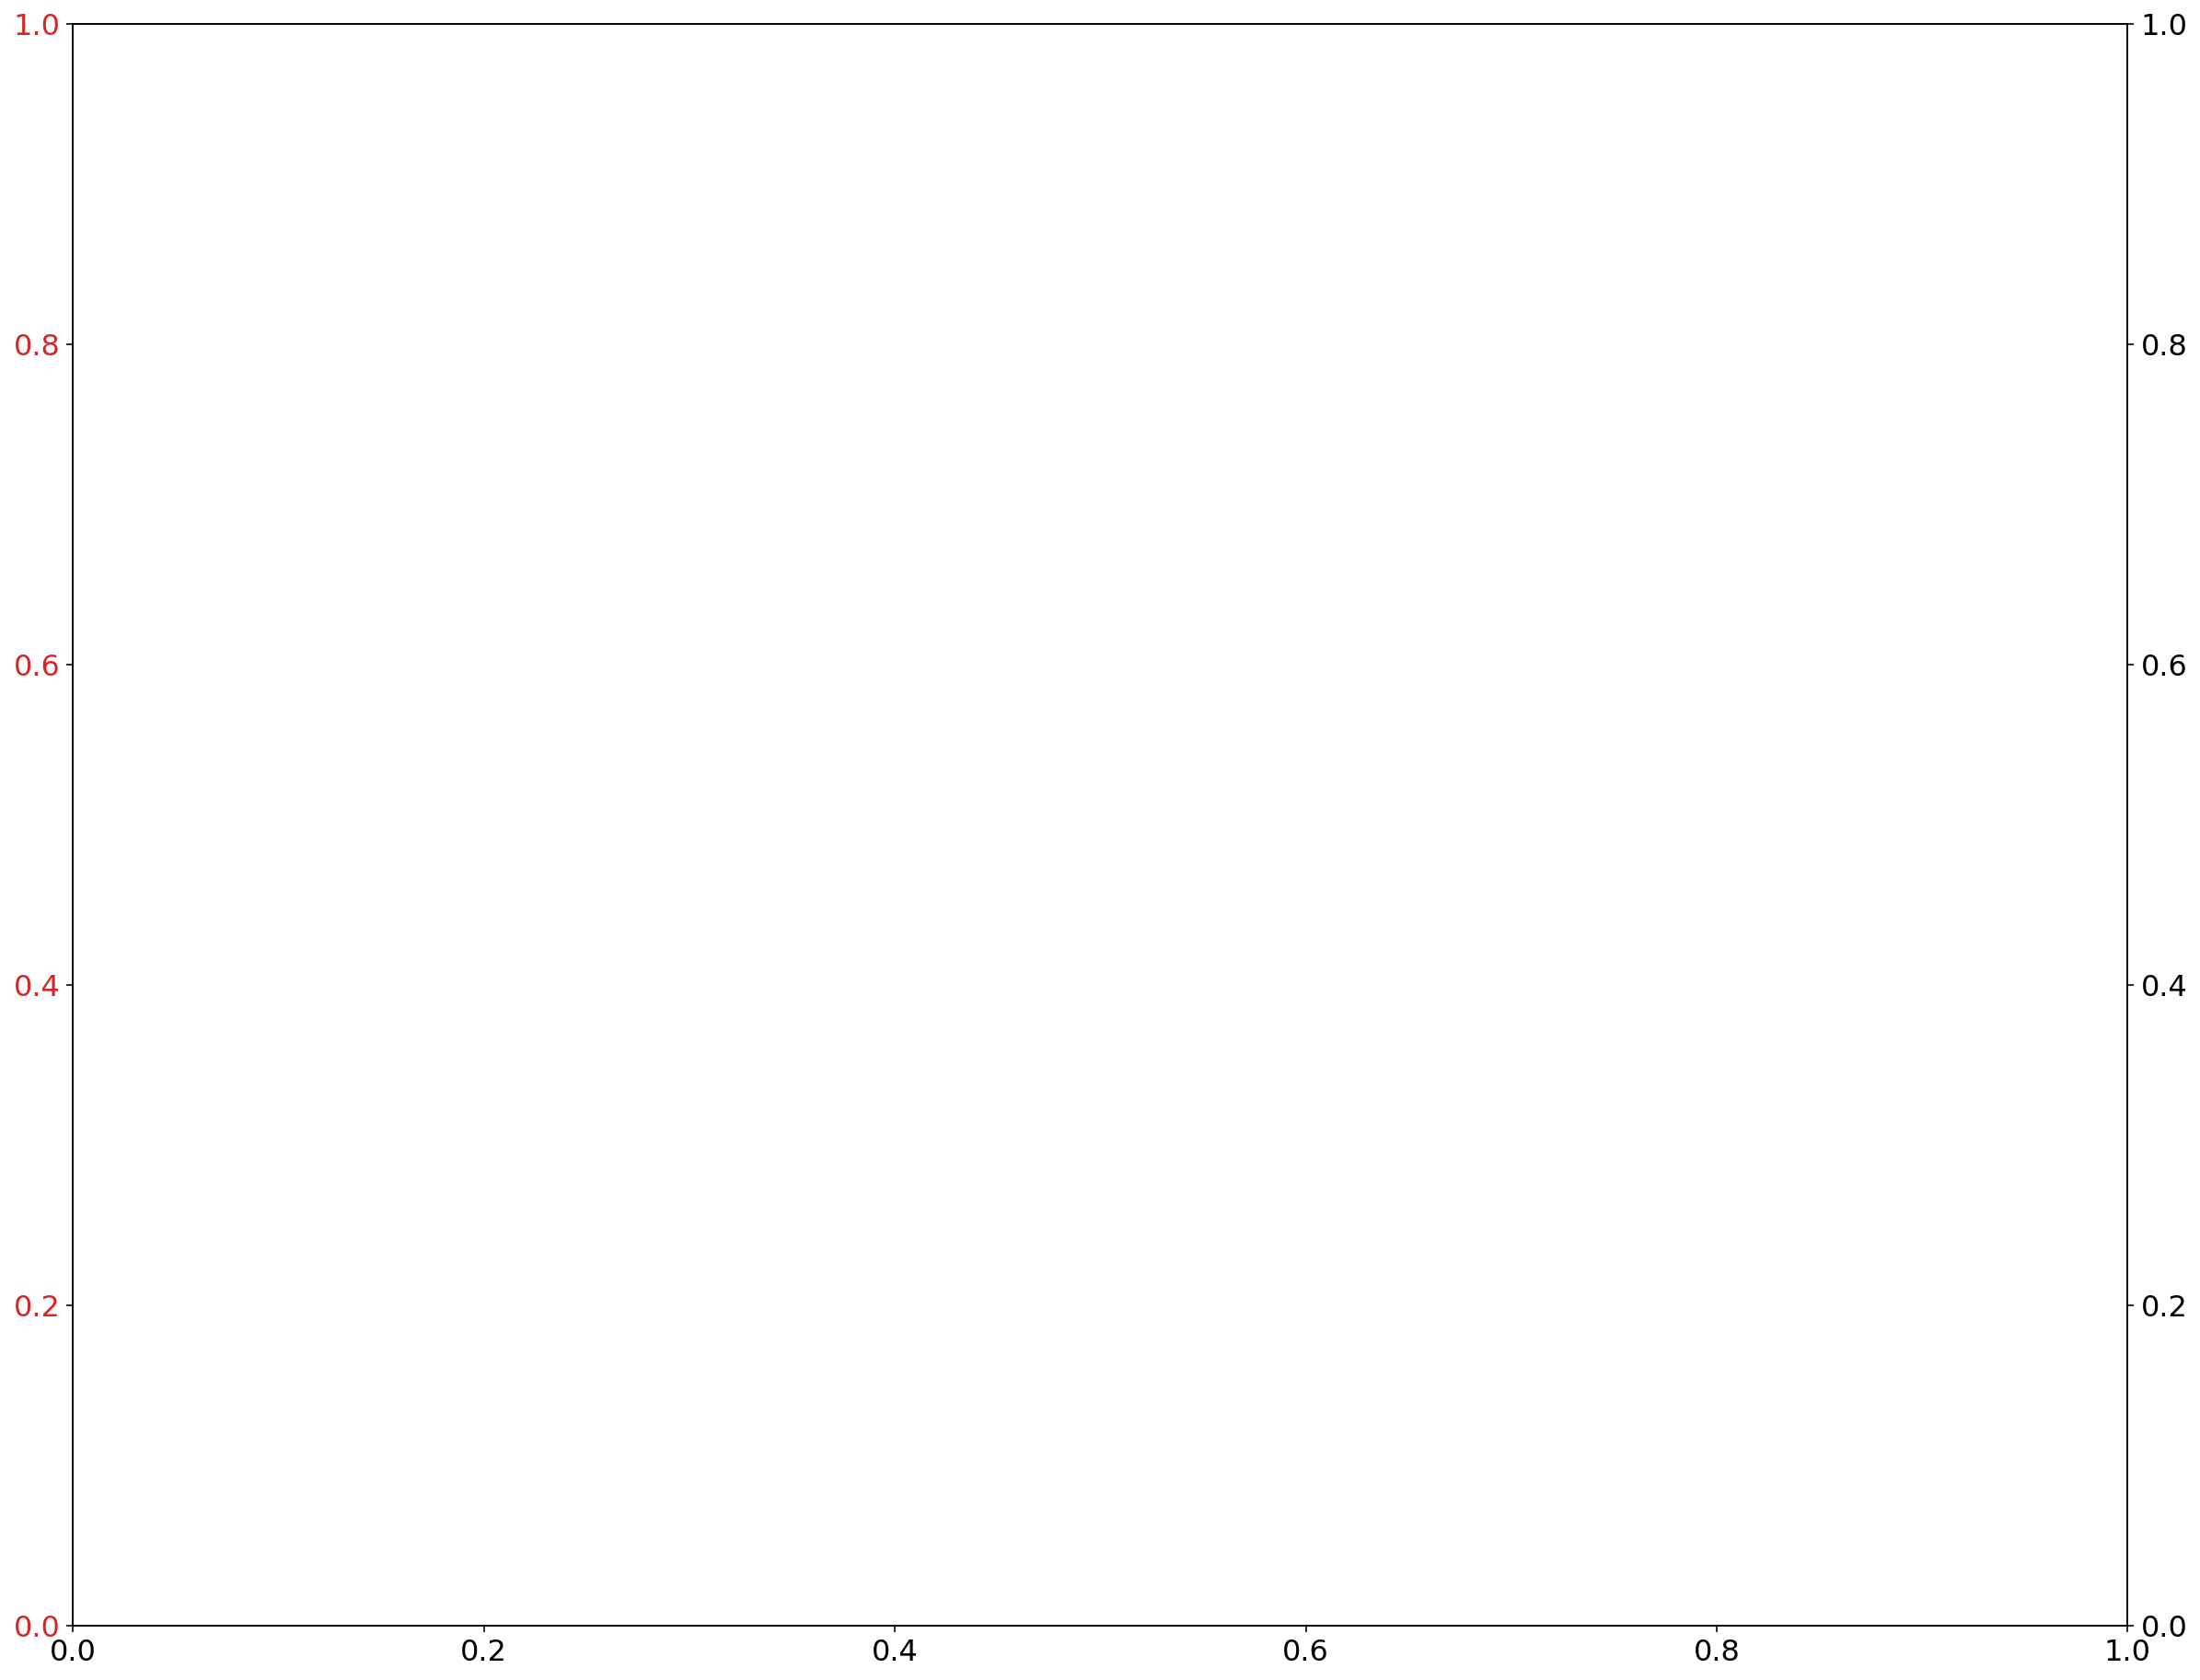

In [19]:
t = 0.1
model.plot(t)

In [ ]:
t = 0.5
model.plot(t)

In [ ]:
t = 0.9
model.plot(t)

In [ ]:
t = 1.1
model.plot(t)

In [11]:
plt.rc('figure', figsize=(8,5))

In [14]:
plt.style.use('thesis')

#import matplotlib as mpl
